# ***Disease Prediction from Medical Data*** 🩺

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

Step 1: Data Loading and Preliminary Analysis

In [16]:
# Load the dataset
file_path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Mal

Step 2: Data Preprocessing

In [17]:
# Handling missing values for 'bmi'
median_bmi = data['bmi'].median()
data['bmi'].fillna(median_bmi, inplace=True)

Step 3: Exploratory Data Analysis (EDA)



Descriptive Statistics for Numerical Features:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.862035     0.048728  
std            45.283560     7.699562     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.100000     0.0000

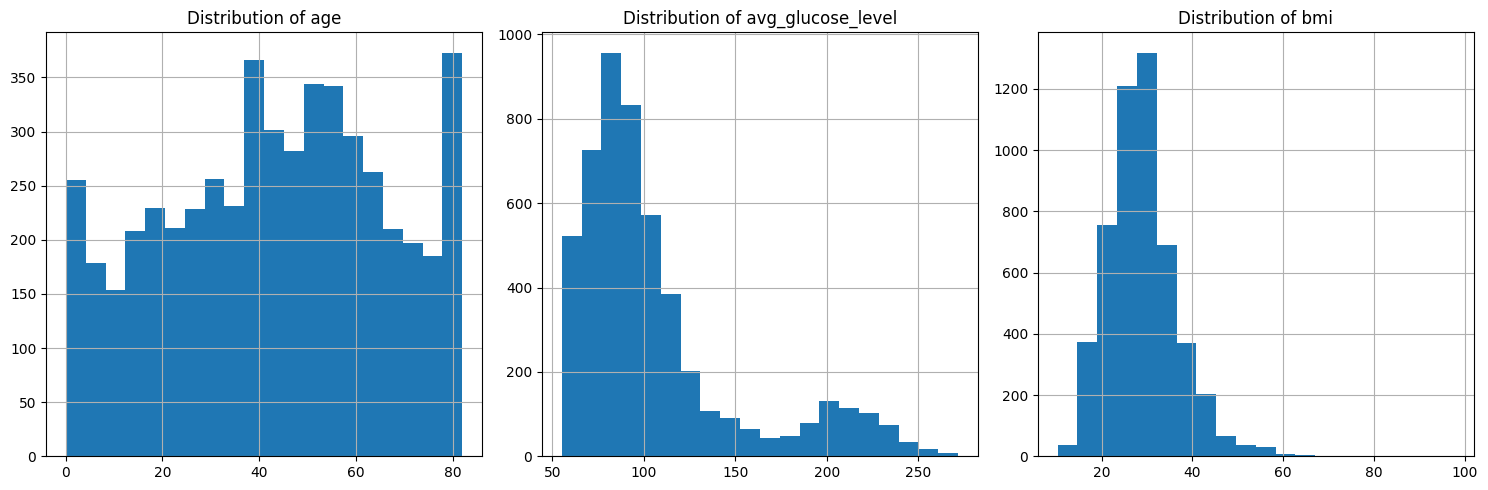

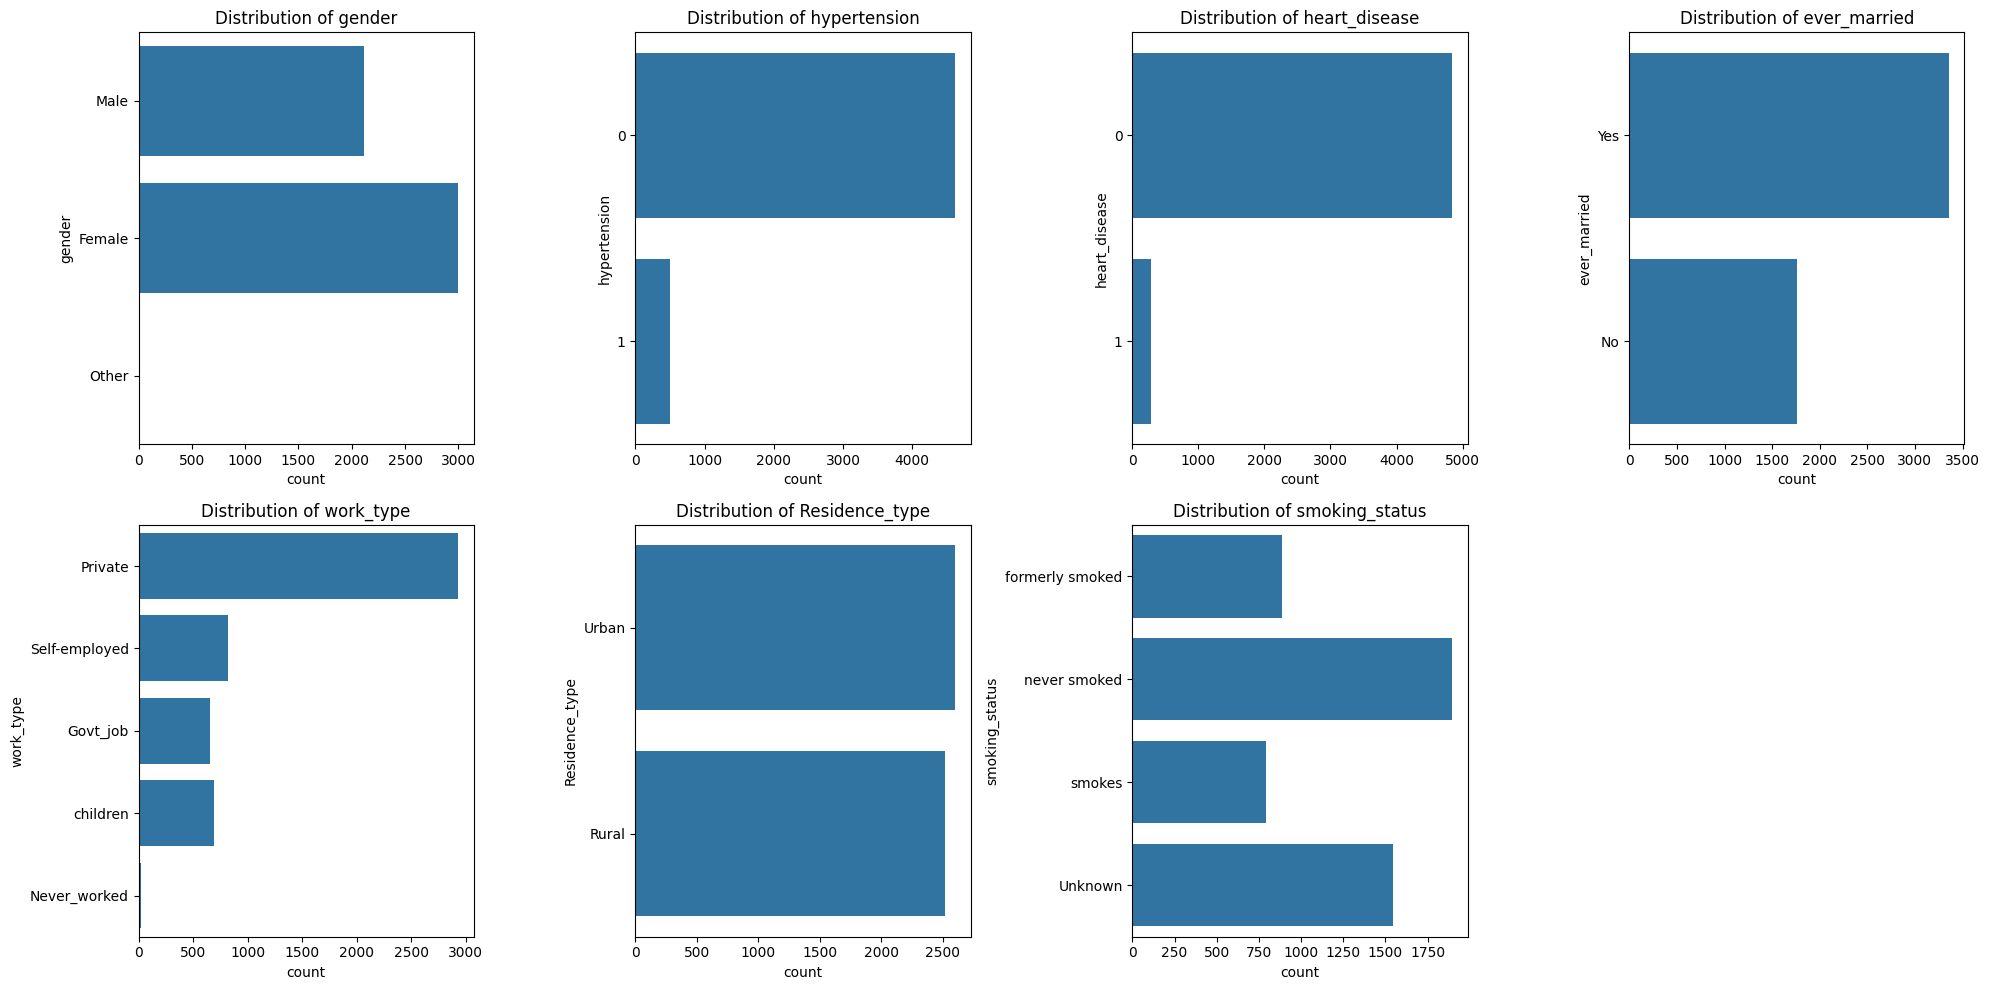

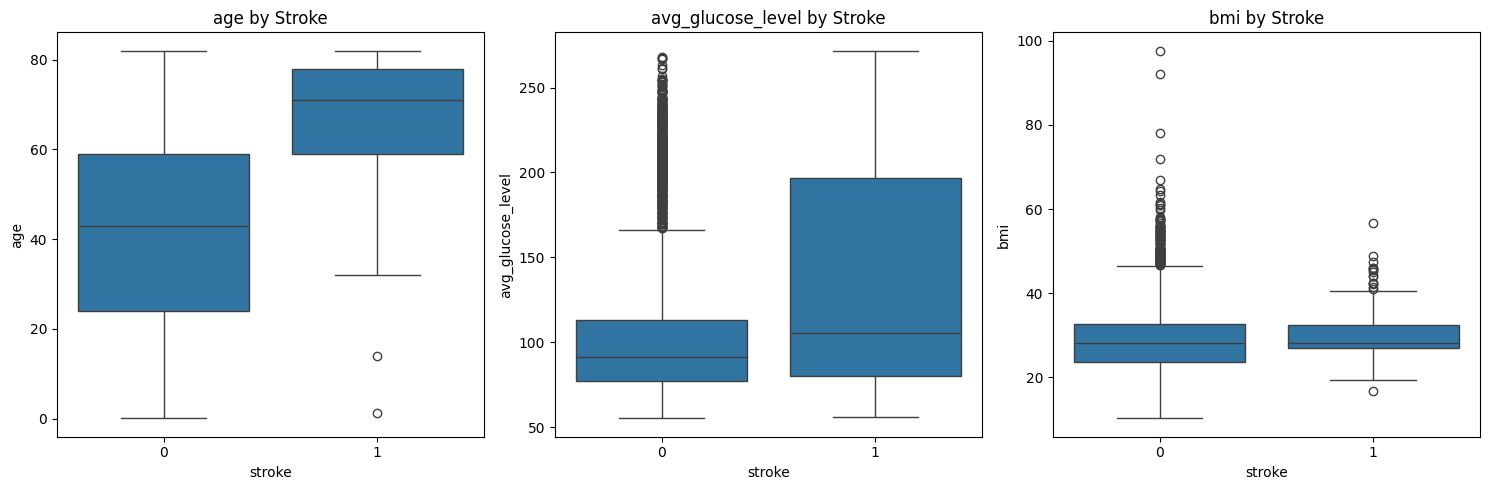

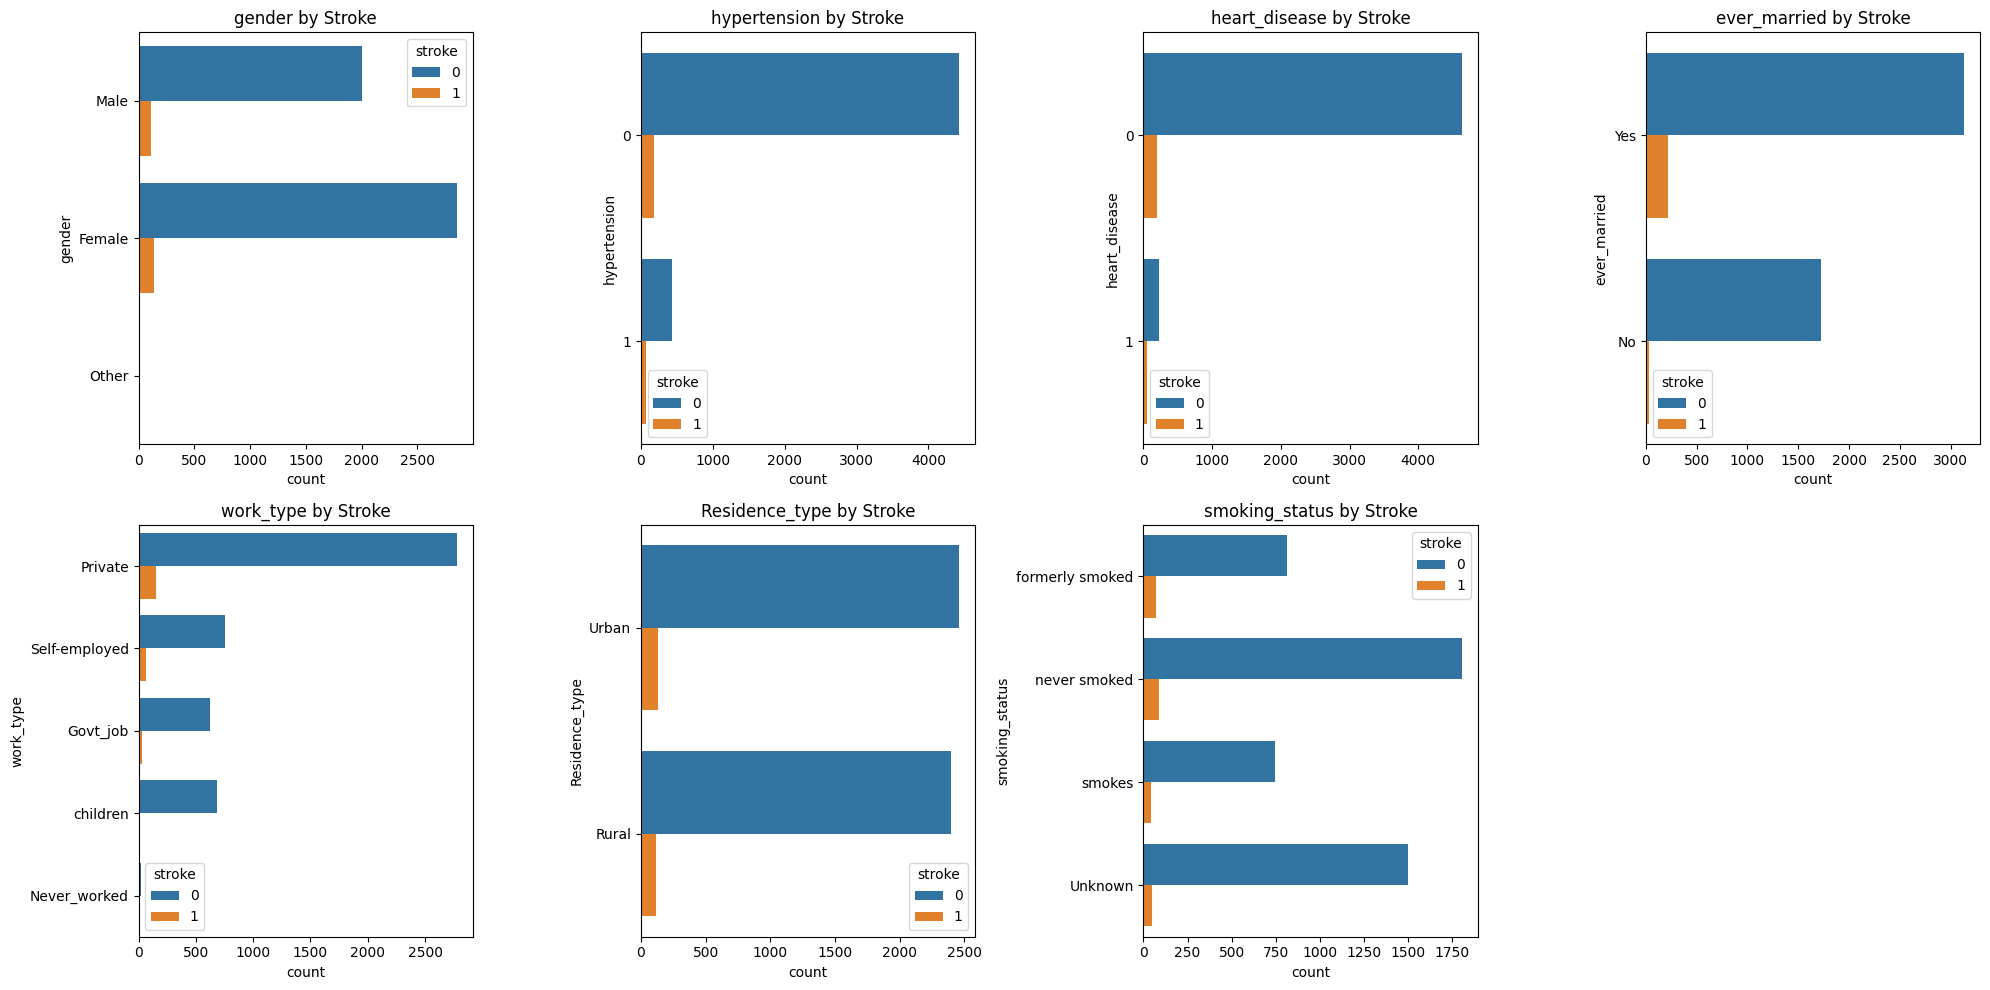

In [18]:
# Descriptive statistics for numerical variables
print("\nDescriptive Statistics for Numerical Features:")
print(data.describe())

# Plotting histograms for the numerical variables
numerical_features = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    data[feature].hist(bins=20)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualizing the distribution of categorical variables
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                        'work_type', 'Residence_type', 'smoking_status']
plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=feature, data=data)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualizing the relationship between different variables and stroke occurrence
# For numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='stroke', y=feature, data=data)
    plt.title(f'{feature} by Stroke')
plt.tight_layout()
plt.show()

# For categorical features
plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=feature, hue='stroke', data=data)
    plt.title(f'{feature} by Stroke')
plt.tight_layout()
plt.show()

Step 4: Encoding Categorical Variables

In [19]:
# Features and target variable
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

# Encoding categorical variables using OneHotEncoder
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Preprocessing pipelines for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

Step 5: Splitting the Data into Training and Test Sets

In [20]:
# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Step 6: Model Training and Evaluation

In [21]:
# Create and train the Logistic Regression model
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])
lr_model.fit(X_train, y_train)

# Evaluate the model performance on training data
train_accuracy = lr_model.score(X_train, y_train)
print(f'\nTraining Accuracy: {train_accuracy:.2f}')

# Evaluate the model performance on test data
test_accuracy = lr_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Classification report and confusion matrix
y_test_pred = lr_model.predict(X_test)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix for Test Data:")
print(confusion_matrix(y_test, y_test_pred))

# ROC-AUC score
test_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f'Test ROC-AUC Score: {test_roc_auc:.2f}')


Training Accuracy: 0.95
Test Accuracy: 0.95

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022

Confusion Matrix for Test Data:
[[972   0]
 [ 49   1]]
Test ROC-AUC Score: 0.84


Step 7: Final Visualization of Model Performance

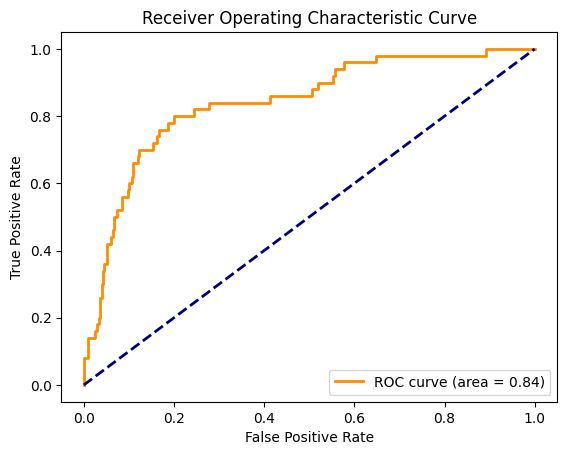

In [22]:
# Visualizing the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()